# Health Survey Data Analysis

Christina Craig

## Executive Summary

The main project goals are to evalute for the confedence interval for the sample and to do a basic t-test on the hypothesis that owning a home may be different then renting when it comes to overall health.

After doing a 2-tailed T-test on the dataset, we couldn't reject our null hypothesis that there is no signifigant difference in health between owning or renting your home.


## The Data


This data is sourced from CDC Behavioral Risk Factor Surveillance System (BRFSS). This data set is the New York responses from the 2020-2021 survey. 

The column `PHYSHLTH` contains the responces to the question `Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?`. 

The responses were coded as :

| Value  | Value Label          |
| ------ | -------------------- |
| 1 - 30 | Number of days       |
| 88     | None                 |
| 77     | Don't know/Not sure  |
| 99     | Refused              |
| BLANK  | Not asked or Missing |

The column `RENTHOM1` contains the responses to the question `Do you own or rent your home?`.

The responses were coded as :

| Value | Value Label          |
| ----- | -------------------- |
| 1     | Own                  |
| 2     | Rent                 |
| 3     | Other arrangement    |
| 7     | Don't know/Not Sure  |
| 9     | Refused              |
| BLANK | Not asked or Missing |



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats


file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

## Data Preparation

To prepare `PHYSHLTH1`, we need to replace the code 88, which stands for 0 days feeling unhealthy with a 0. Then, we need to remove the other codes by simply limiting the dataset down to anything 30 and under, for the number of days in the month. 

For `RENTHOM1`, we just need to limit the dataset to anything just containing 1 (own) or a 2 (rent) in that column.

In [3]:
# replacing the 88 code with a 0

df['PHYSHLTH'].replace(88, 0, inplace = True)

# limiting the dataset to 30 days and under

df = df[df['PHYSHLTH'] <= 30]

# Just making sure ...

df['PHYSHLTH'].value_counts()

0.0     10565
30.0      768
2.0       597
1.0       410
5.0       367
3.0       361
10.0      231
7.0       209
15.0      194
4.0       163
20.0      147
14.0      144
25.0       55
6.0        47
8.0        45
21.0       26
28.0       22
12.0       22
9.0        11
29.0        8
13.0        7
18.0        6
17.0        6
16.0        6
24.0        5
27.0        5
11.0        4
26.0        3
23.0        3
19.0        2
22.0        1
Name: PHYSHLTH, dtype: int64

In [4]:
# Limiting the data by the column `RENTHOM1` to 1 or 2

df = df[df['RENTHOM1'] <= 2]

# Just making sure

df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

## Confidence Interval for Mean of `PHYSHLTH`

In [5]:
# Bootstrapping for the somewhat normal curve

np.random.seed(1976)
bs_sample_mean = []

for i in range(0, 10000):
    sample = np.random.choice(a=df.PHYSHLTH, size=50)
    sample_mean = np.mean(sample)
    bs_sample_mean.append(sample_mean)


In [6]:
# Setting up the variables

df_physhlth_mean = sum(bs_sample_mean) / len(bs_sample_mean)
df_physhlth_std = np.std(bs_sample_mean)
df_physhlth_size = len(bs_sample_mean)
se = df_physhlth_std/np.sqrt(df_physhlth_size)


In [7]:
physhlth_conf = stats.t.interval(alpha = .95, loc=df_physhlth_mean, scale=se, df=df_physhlth_size-1)

In [8]:
physhlth_conf

(3.037524265885255, 3.0797557341147734)

With a 95% confidence, the population average for feeling unwell in a particular month in New York state is between 3.0476 days to 3.0798 days. 


## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

For this section, we're only interested in the answers from people that own or rent their homes, so we limit down the dataset and create two subsets based on own or rent.

In [9]:
# Making a subset of home owners

home_own = df[df['RENTHOM1'] == 1]

# Making a subset of renters

home_rent = df[df['RENTHOM1'] == 2]


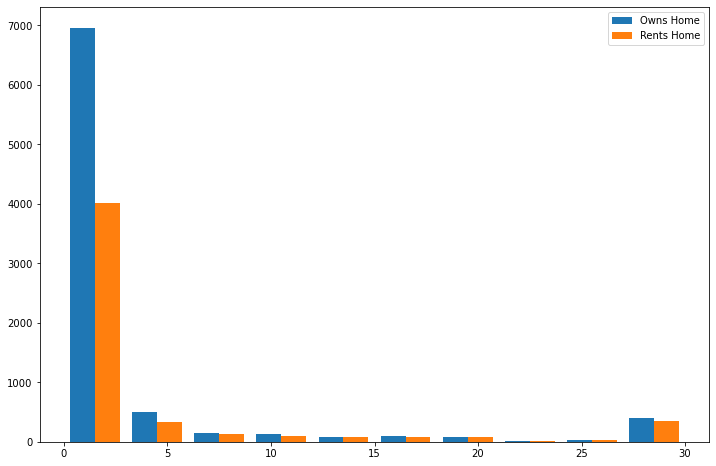

In [11]:
x = home_own.PHYSHLTH
y = home_rent.PHYSHLTH
plt.figure(figsize=(12,8))

plt.hist([x, y], label=['Owns Home', 'Rents Home'])

plt.legend(loc='upper right')
plt.show()

From the graph is looks like people that rented reported feeling unwell about the same as then home owners, but the home owner subset is around 3200 rows larger then the renters subset.

### Is the Difference Statistically Significant?

TODO: describe the null and alternative hypotheses in Markdown, including whether this is a one-tailed or two-tailed test

Our null hypothesis is there is no difference between owning and renting your home.

Our alternative hypothesis is there significant difference between owning and renting your home.

We're doing a two-tailed independent t-test so we can see if there's changes in either direction, and the populations are indepedent of each other.

We can't reject our null hypothesis since the p-value is greater than our alpha of .05. 

In [ ]:
# creating sample sets

own_sample = home_own.sample(n=250, random_state=1976)
rent_sample = home_rent.sample(n=250, random_state=1976)

In [ ]:
print("Variance of Home Owners sample: ", own_sample.PHYSHLTH.var())
print("Variance of Renters sample: ", rent_sample.PHYSHLTH.var())

In [ ]:
results = stats.ttest_ind(own_sample.PHYSHLTH, rent_sample.PHYSHLTH, equal_var=False, alternative='two-sided')
results

In [ ]:
p_val = results[1]
print('P value of t test: ', p_val)

We can't reject our null hypothesis since the p-value is greater than our alpha of .05. 

## Next Steps

I think it would be interesting to see if there's any relationship between the length of time since someone's last smoked, using LASTSMK2, and how they feel for the time period surveyed.